# The Boltzmann Bank

This is an agent-based simulation of very simple economic activity. The model has two types of agents:

+ `Individual`
+ `Bank`

## Initialization

In [1]:
import seaborn as sns

from model import BoltzmannBank, Individual, Bank

In [2]:
model = BoltzmannBank(
    num_individuals = 100,
    individual_loan_limit = 1,
    loan_review_limit = 10,
)

Hello!


In [3]:
num_steps = 100

for _ in range(num_steps):
    model.step()

## Visualization

In [4]:
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()
individual_df = model.datacollector.get_agenttype_vars_dataframe(Individual)

### The Money Supply

For our simple model, the money supply is entirely composed bank liabilities.

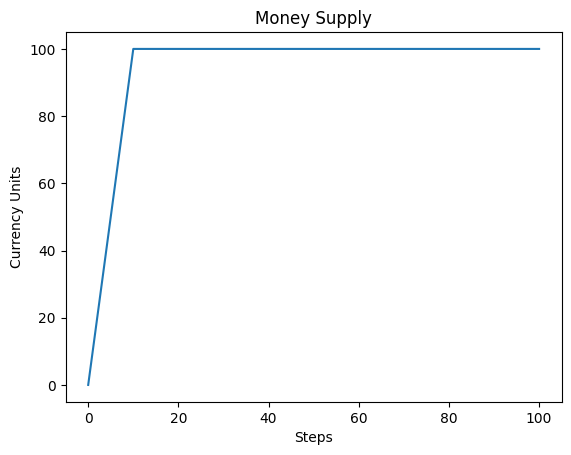

In [5]:
money_supply = model_df["Money Supply"]

g = sns.lineplot(data=money_supply)
g.set(title="Money Supply", xlabel="Steps", ylabel="Currency Units");

### Total Spending

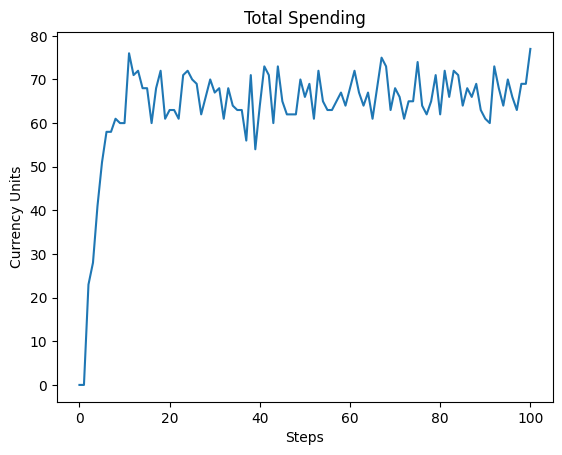

In [6]:
total_spending = model_df["Total Spending"]

g = sns.lineplot(data=total_spending)
g.set(title="Total Spending", xlabel="Steps", ylabel="Currency Units");

### The Individual Wealth Distribution

For our very simple model, each individual's wealth is its quantity of money, which is to say the balance of its bank account.

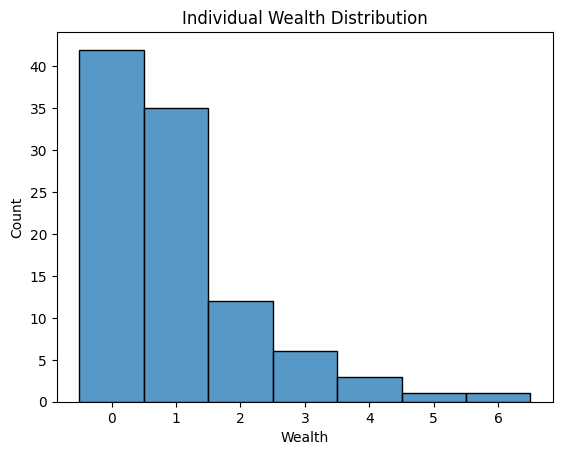

In [7]:
# last_step = individual_df.index.get_level_values("Step").max()
wealth_curve = individual_df.xs(num_steps, level="Step")["Wealth"].sort_values().values

g =sns.histplot(wealth_curve, discrete=True)
g.set(title="Individual Wealth Distribution", xlabel="Wealth");

### The Individual Wealth Gini Index

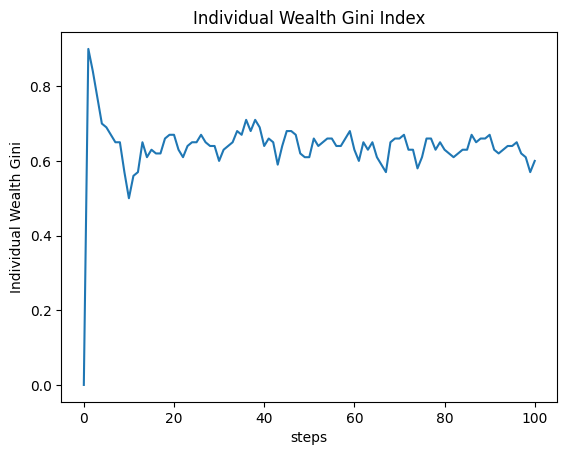

In [8]:
wealth_gini = model_df["Individual Wealth Gini"]

g = sns.lineplot(data=wealth_gini)
g.set(title="Individual Wealth Gini Index", xlabel="steps");

### The Individual Income Distribution

We can also look at the income distribution of our individuals.

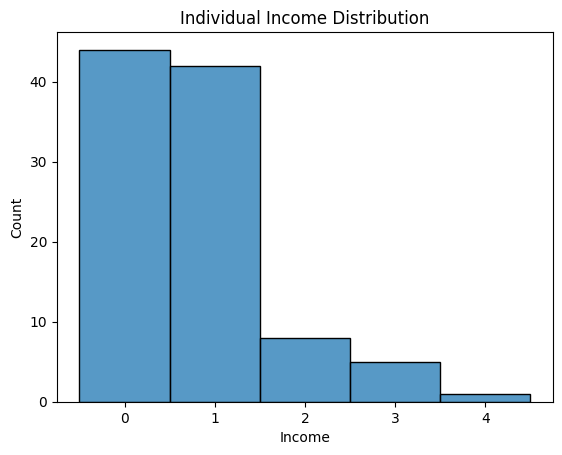

In [9]:
income_curve = individual_df.xs(num_steps, level="Step")["Income"].sort_values().values

g =sns.histplot(income_curve, discrete=True)
g.set(title="Individual Income Distribution", xlabel="Income");

### The Individual Income Gini Index

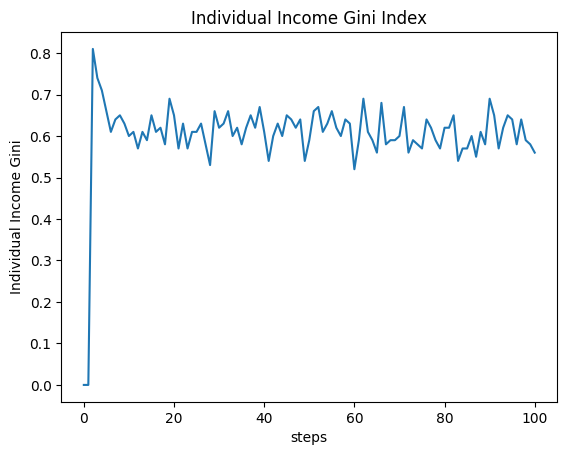

In [10]:
income_gini = model_df["Individual Income Gini"]

g = sns.lineplot(data=income_gini)
g.set(title="Individual Income Gini Index", xlabel="steps");

### The Individual Spending Distribution

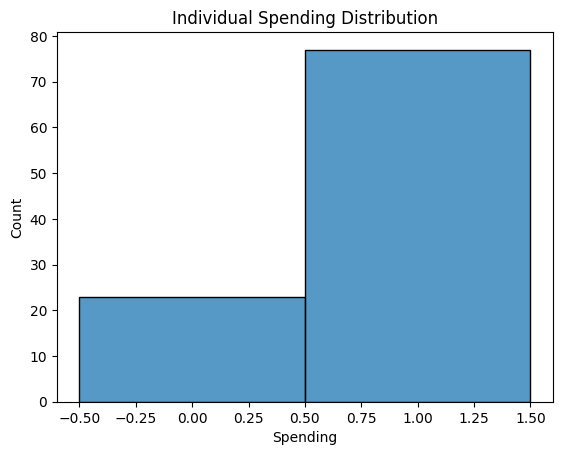

In [11]:
spending_curve = individual_df.xs(num_steps, level="Step")["Spending"].sort_values().values

g =sns.histplot(spending_curve, discrete=True)
g.set(title="Individual Spending Distribution", xlabel="Spending");

### The Individual Spending Gini Index

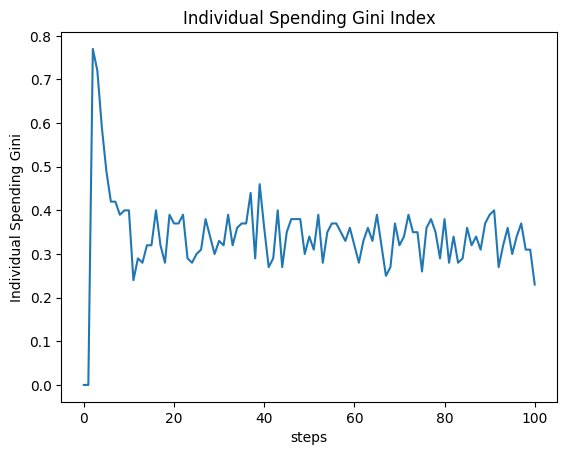

In [12]:
spending_gini = model_df["Individual Spending Gini"]

g = sns.lineplot(data=spending_gini)
g.set(title="Individual Spending Gini Index", xlabel="steps");

### Comparing the Distributions of Wealth, Income and Spending

In our very simple model, individuals accumulate wealth by having an income in excess of their spending.

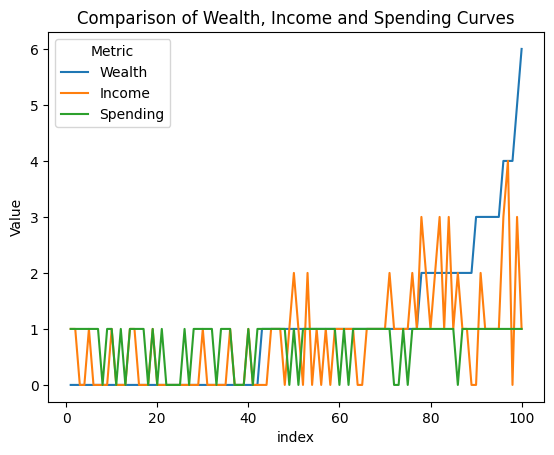

In [13]:
wis_df = individual_df.xs(num_steps, level="Step").sort_values(by="Wealth")
wis_df.index = range(1, len(wis_df) + 1)
long_wis_df = wis_df.reset_index().melt(id_vars="index", var_name="Metric", value_name="Value")

g = sns.lineplot(data=long_wis_df, x="index", y="Value", hue="Metric")
g.set(title="Comparison of Wealth, Income and Spending Curves");